In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data = pd.read_csv('titanic.csv')

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
data['family'] = data['SibSp'].values + data['Parch']

In [33]:
data.drop(columns=['SibSp','Parch'],inplace=True)

In [35]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family
0,892,0,3,"Kelly, Mr. James",male,34.5,330911,7.8292,NaN,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,NaN,S,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,NaN,Q,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,NaN,S,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,NaN,S,2


In [36]:
data = data[['Age','Fare','Survived']]

In [39]:
data.shape

(418, 3)

In [40]:
data.dropna(inplace=True)

In [41]:
data.head()

,Age,Fare,Survived
0,34.5,7.8292,0
1,47.0,7.0000,1
2,62.0,9.6875,0
3,27.0,8.6625,0
4,22.0,12.2875,1


In [42]:
x= data[['Age','Fare']]
y=data['Survived']

In [43]:
y

0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 331, dtype: int64

# Train test split

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Standrad Scaler

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
# alwase keep in mind we run fit on just train data
scaler.fit(x_train)

StandardScaler()

In [47]:
# and we transform on both train and test data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [48]:
scaler.mean_

array([29.37337662, 35.59491385])

In [49]:
x_train_scaled

array([[ 2.51106164,  0.9887786 ],
       [-1.98506898, -0.26183126],
       [-1.91255074, -0.45360656],
       [-0.82477721,  0.5073488 ],
       [-0.46218603, -0.45100798],
       [ 0.04544162,  2.41054974],
       [ 0.26299633, -0.31224374],
       [-0.17211309, -0.58977222],
       [-1.47744133, -0.67405356],
       [-1.40492309, -0.13450078],
       [-0.24463132,  2.10348474],
       [ 0.19047809, -0.58240888],
       [-1.47744133, -0.42303061],
       [ 0.84314221, -0.42718834],
       [ 0.77062398, -0.46971776],
       [ 1.49580634, -0.19946531],
       [ 0.69810574, -0.1225473 ],
       [-0.82477721, -0.02536036],
       [ 1.71336104,  0.96175336],
       [ 1.85839752,  0.2994623 ],
       [ 1.13321516,  0.35256067],
       [-0.24463132, -0.57617228],
       [-1.18736839,  4.71445191],
       [-2.05758721,  0.12440523],
       [-0.31714956, -0.08512773],
       [-1.69499604,  2.05610325],
       [-0.09959485, -0.52168939],
       [ 1.78587928,  0.96175336],
       [-0.67974074,

### now you can see there is problem with standred scaler it takes data frame but it returns a numpy array so its solution is fowling

In [50]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_train.columns)

In [51]:
x_train_scaled

,Age,Fare
0,2.511062,0.988779
1,-1.985069,-0.261831
2,-1.912551,-0.453607
3,-0.824777,0.507349
4,-0.462186,-0.451008
...,...,...
226,-0.679741,-0.451788
227,1.133215,-0.116311
228,0.117960,-0.365775
229,0.408033,-0.575827


In [52]:
#orignal x_train
x_train.describe()

,Age,Fare
count,231.000000,231.000000
mean,29.373377,35.594914
std,13.819580,48.207630
min,0.830000,0.000000
25%,21.000000,8.050000
50%,27.000000,15.245800
75%,36.000000,36.877100
max,67.000000,263.000000


In [55]:
#after applying scalling
np.round(x_train_scaled.describe(),1)

,Age,Fare
count,231.0,231.0
mean,0.0,0.0
std,1.0,1.0
min,-2.1,-0.7
25%,-0.6,-0.6
50%,-0.2,-0.4
75%,0.5,0.0
max,2.7,4.7


## effects of scalling

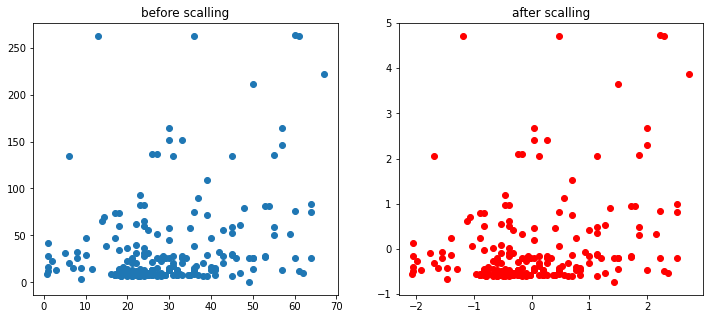

In [62]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['Fare'])
ax1.set_title("before scalling")

ax2.scatter(x_train_scaled['Age'],x_train_scaled['Fare'],color='red')
ax2.set_title("after scalling")
plt.show()

# Why scalling is important

In [83]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr_scaled =LogisticRegression()

In [84]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [85]:
y_pred= lr.predict(x_test)
y_pred_scaled= lr_scaled.predict(x_test_scaled)

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
print("actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

actual 0.63
scaled 0.63


In [103]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, x_train, y_train, cv=5, scoring='accuracy').mean()

0.6322849213691026

In [104]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr_scaled, x_train_scaled, y_train, cv=5, scoring='accuracy').mean()

0.6322849213691026

#### keep in mind there is no disadvantage of scalling but depending on the algoridhm it would be gives more benifits 

In [97]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [98]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [99]:
y_pred= dt.predict(x_test)
y_pred_scaled= dt_scaled.predict(x_test_scaled)

In [100]:
print("actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

actual 0.64
scaled 0.61


In [101]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt, x_train, y_train, cv=5, scoring='accuracy').mean()

0.5495837187789084

In [102]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt_scaled, x_train_scaled, y_train, cv=5, scoring='accuracy').mean()

0.5666975023126735

### now we can clearly see there is benefit of applying standred scaler in data set